In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\HP\Documents\NareshIT\Data Files\Visadataset - Visadataset (1).csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


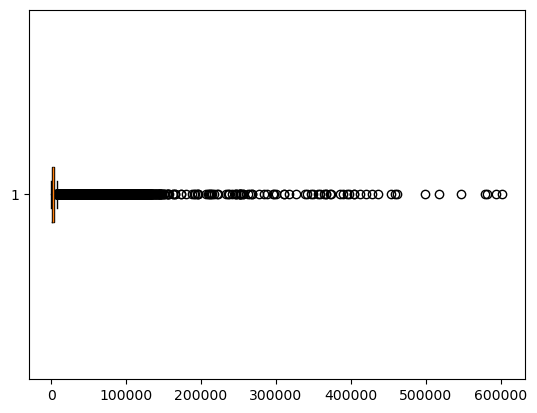

In [3]:
plt.boxplot(visa_df['no_of_employees'], vert=False)
plt.show()

<Axes: >

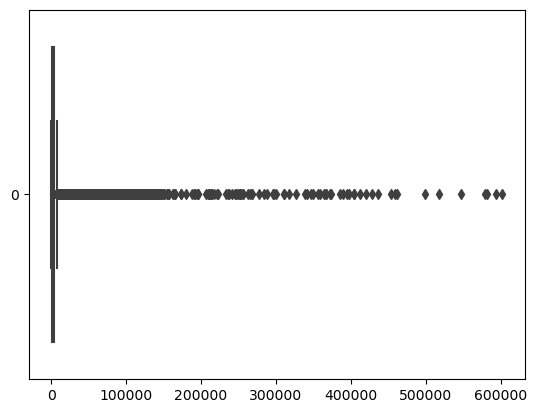

In [4]:
sns.boxplot(visa_df['no_of_employees'],orient='h')

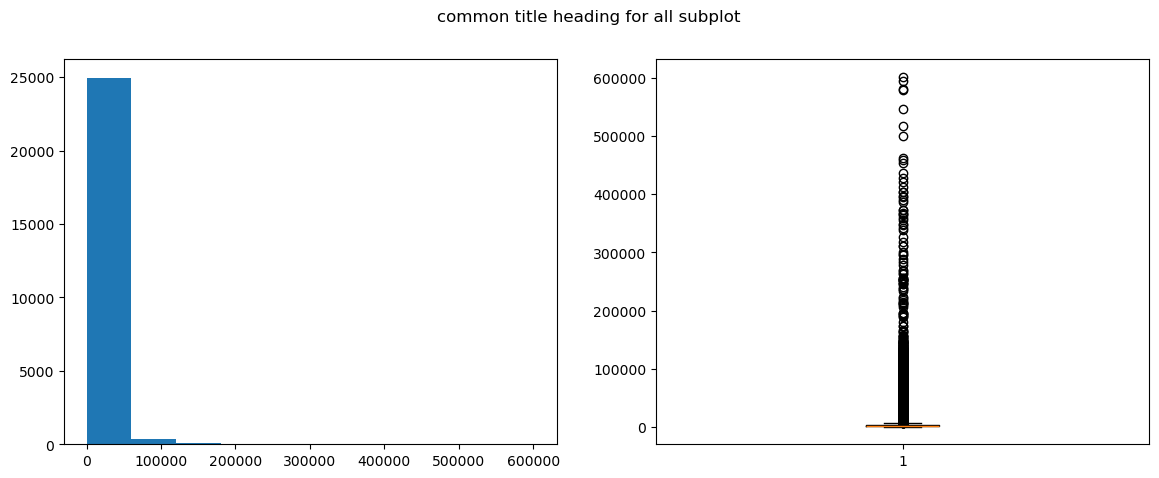

In [5]:
plt.figure(figsize=(14,5))
plt.suptitle('common title heading for all subplot')
plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df['no_of_employees'])
plt.show()

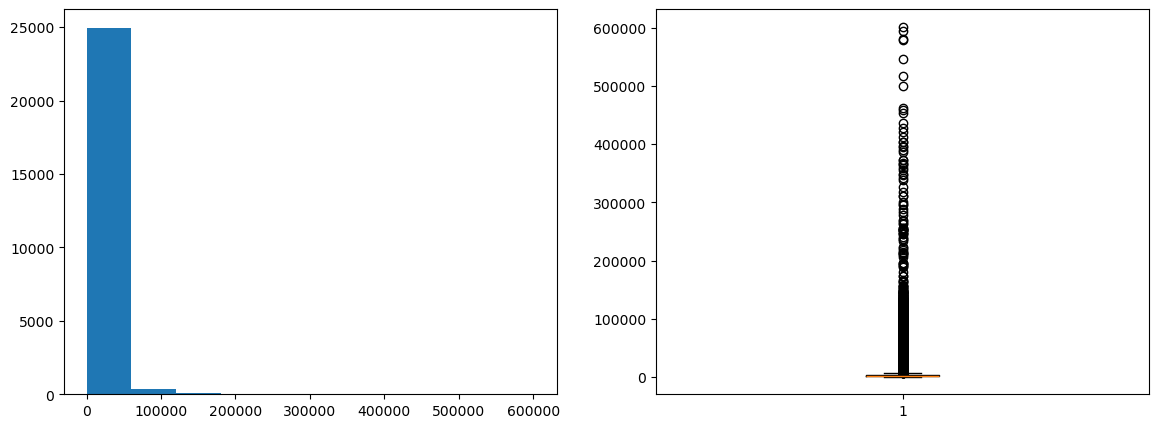

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(visa_df['no_of_employees'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['no_of_employees'])
plt.show()

In [7]:
Q1=round(np.percentile(visa_df['no_of_employees'], 25), 2)
Q3=round(np.percentile(visa_df['no_of_employees'], 75), 2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR
con1=visa_df['no_of_employees']<LB
con2=visa_df['no_of_employees']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

1556

In [8]:
Q1=round(np.percentile(visa_df['no_of_employees'], 25), 2)
Q3=round(np.percentile(visa_df['no_of_employees'], 75), 2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR
con1=visa_df['no_of_employees']>LB
con2=visa_df['no_of_employees']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

23924

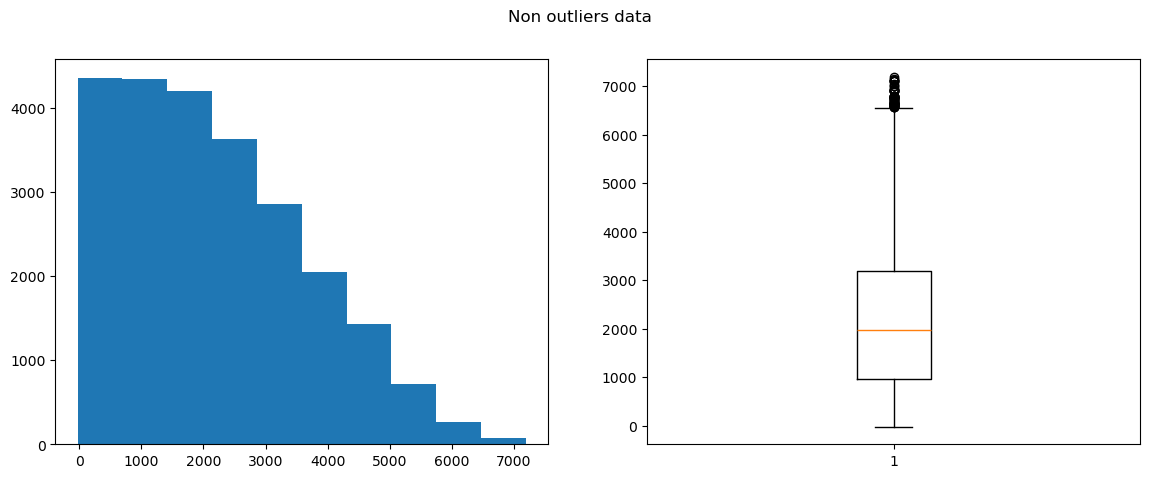

In [9]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['no_of_employees']) 
plt.subplot(1,2,2).boxplot(non_outliers_data['no_of_employees']) 
plt.show()

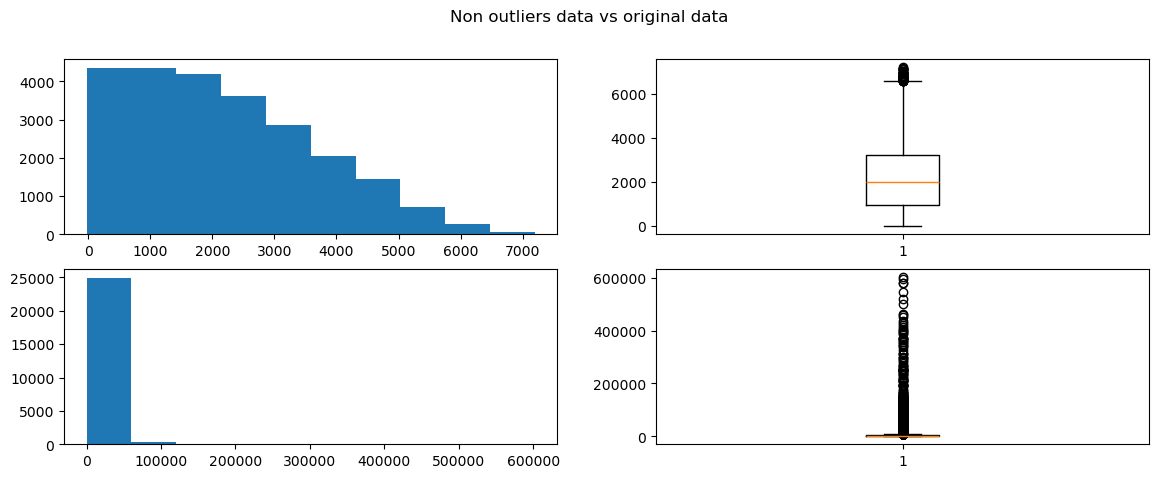

In [10]:
plt.figure(figsize=(14,5))  

plt.suptitle('Non outliers data vs original data')
plt.subplot(2,2,1).hist(non_outliers_data['no_of_employees']) 
plt.subplot(2,2,2).boxplot(non_outliers_data['no_of_employees']) 


plt.subplot(2,2,3).hist(visa_df['no_of_employees']) 
plt.subplot(2,2,4).boxplot(visa_df['no_of_employees']) 
plt.show()

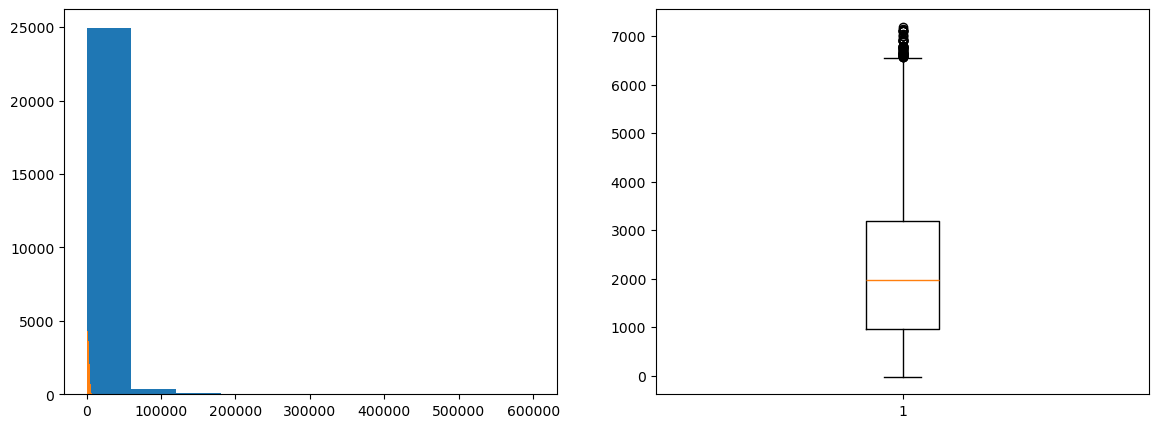

In [11]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,1).hist(non_outliers_data['no_of_employees']) 
plt.subplot(1,2,2).boxplot(non_outliers_data['no_of_employees']) 
plt.show()

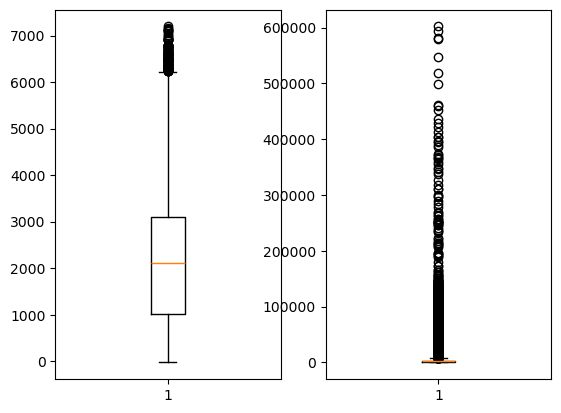

In [17]:
l1= []
median = visa_df['no_of_employees'].median()

Q1 = np.percentile(visa_df['no_of_employees'], 25)
Q3 = np.percentile(visa_df['no_of_employees'], 75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR


for value in visa_df['no_of_employees'].values:
    if value  < LB or value > UB:
        l1.append(median)
    else:
        l1.append(value)
        
visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees'] = l1
plt.subplot(1,2,1).boxplot(visa_df_copy['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df['no_of_employees'])
plt.show()

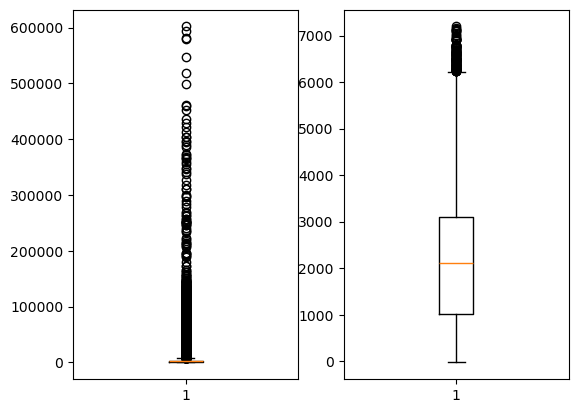

In [18]:
l=[]
median = visa_df['no_of_employees'].median()
for i in (visa_df['no_of_employees'].values):
    if i <LB or i>UB:
        l.append(median)
    else:
        l.append(i)
        
visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees'] = l
plt.subplot(1,2,1).boxplot(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'])
plt.show()

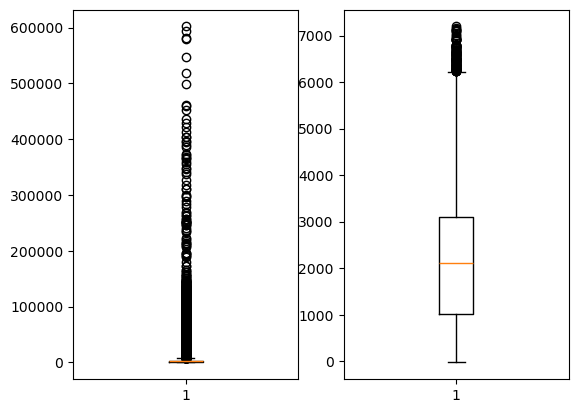

In [19]:
con1=visa_df['no_of_employees']<LB
con2=visa_df['no_of_employees']>UB
con=con1 | con2

median=visa_df['no_of_employees'].median()

new_data=np.where(con,
                  median,
                  visa_df['no_of_employees'])

visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees'] = new_data
plt.subplot(1,2,1).boxplot(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'])
plt.show()